<a href="https://colab.research.google.com/github/ofchwan/Deep_Learning/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 창시자에게 배우는 딥러닝

## 3. 케라스와 텐서플로 소개

### 3.5 텐서플로 시작하기

In [1]:
import tensorflow as tf

In [3]:
# 초깃값이 모두 1인 텐서 만들기
x = tf.ones(shape = (2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
# 초깃값이 모두 0인 텐서 만들기
x = tf.zeros(shape = (2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
# 초기값이 random한 텐서 만들기
x = tf.random.normal(shape = (3, 1), mean = 0, stddev = 1) # 평균이 0이고, 표준 편차가 1인 정규 분포에서 뽑은 랜덤한 값으로 초기화한 텐서
print(x)

tf.Tensor(
[[ 0.00739296]
 [-0.4111653 ]
 [ 1.0734617 ]], shape=(3, 1), dtype=float32)


In [6]:
# 초기값이 random한 텐서 만들기
x = tf.random.uniform(shape = (3, 1), minval = 0., maxval = 1.) # 최소가 0이고 최대가 1인 균등 분포에서 뽑은 랜덤한 값으로 초기화한 텐서
print(x)

tf.Tensor(
[[0.2443173 ]
 [0.15095043]
 [0.65381575]], shape=(3, 1), dtype=float32)


* 텐서는 값을 할당할 수 없음(numpy array와의 차이점), 즉 텐서는 상수
* 텐서를 업데이트하기 위해서는 텐서를 변수로 선언해주어야 함

In [7]:
# 텐서 변수 만들기
v = tf.Variable(initial_value = tf.random.normal(shape = (3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.02824091],
       [ 0.7489589 ],
       [ 1.1321006 ]], dtype=float32)>


* 이렇게 변수로 선언한 텐서에 대해서는 **assign** 메소드로 값을 수정할 수 있음

In [8]:
# 텐서 변수 값 수정
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
# 텐서 변수 값 일부만 수정하기
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
# +=, -= 연산
v.assign_add(tf.ones((3, 1))) # assign_add는 += 연산과 동일 즉, v += tf.ones((3, 1))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

In [12]:
# 텐서의 수학연산

a = tf.ones((2, 2))
print(a)

b = tf.square(a) # 텐서 a의 제곱
print(b)

c = tf.sqrt(a) # 텐서 a의 제곱근
print(c)

d = b + c
print(d)

e = tf.matmul(a, b) # 두 텐서의 dot product
print(e)

e *= d # 두 텐서의 원소별 곱
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [18]:
# GradientTape

input_val = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
  result = tf.square(input_val)
gradient = tape.gradient(result, input_val)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [20]:
# 만약 텐서가 상수라면

input_const = tf.constant(3.) # 상수 텐서
with tf.GradientTape() as tape:
  tape.watch(input_const) # 상수 텐서의 경우 tape.watch() 메소드를 호출하여 추적함을 수동으로 명시
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [22]:
# GradientTape를 사용하면, gradient의 gradient도 쉽게 구할 수 있음

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


### 3.5.4 End-to-End 텐서플로 선형 분류기

In [25]:
# 2차원 평면에 두 클래스의 랜덤한 포인트 생성
import numpy as np


num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

In [26]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [27]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = 'float32'),
                     np.ones((num_samples_per_class, 1), dtype = 'float32')))

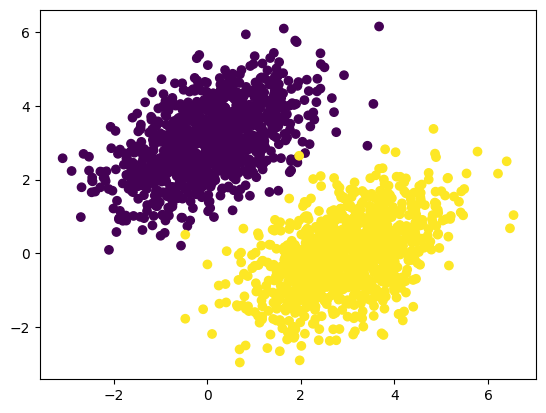

In [28]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [30]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim))) # 가중치 집합 초기화
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim, ))) # bias 초기화

In [31]:
# feed-forward
def model(inputs):
  return tf.matmul(inputs, W) + b # y = ax + b

In [33]:
# loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  print('per_sample_losses : ', per_sample_losses)
  print('tf.reduce_mean : ', tf.reduce_mean(per_sample_losses))
  return tf.reduce_mean(per_sample_losses)

In [36]:
# training step function
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # loss를 파라미터 W와 b에 대해 구한 gradient
  # 구한 gradient를 기반으로 파라미터 update
  W.assign_sub(learning_rate * grad_loss_wrt_W)
  b.assign_sub(learning_rate * grad_loss_wrt_b)
  return loss

In [38]:
# training loop

for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번째 step loss: {loss: .4f}")

per_sample_losses :  tf.Tensor(
[[0.03036169]
 [1.2756295 ]
 [3.4990327 ]
 ...
 [0.38368136]
 [0.02663351]
 [2.9752562 ]], shape=(2000, 1), dtype=float32)
tf.reduce_mean :  tf.Tensor(5.3638554, shape=(), dtype=float32)
0번째 step loss:  5.3639
per_sample_losses :  tf.Tensor(
[[0.91224515]
 [0.72440565]
 [0.40729284]
 ...
 [0.8754991 ]
 [0.9038052 ]
 [1.0906254 ]], shape=(2000, 1), dtype=float32)
tf.reduce_mean :  tf.Tensor(0.7656838, shape=(), dtype=float32)
1번째 step loss:  0.7657
per_sample_losses :  tf.Tensor(
[[0.37982172]
 [0.05021155]
 [0.03523097]
 ...
 [0.10389698]
 [0.23183608]
 [0.0029702 ]], shape=(2000, 1), dtype=float32)
tf.reduce_mean :  tf.Tensor(0.23626357, shape=(), dtype=float32)
2번째 step loss:  0.2363
per_sample_losses :  tf.Tensor(
[[0.47367945]
 [0.16624057]
 [0.00547316]
 ...
 [0.2570324 ]
 [0.3727502 ]
 [0.14697999]], shape=(2000, 1), dtype=float32)
tf.reduce_mean :  tf.Tensor(0.16470654, shape=(), dtype=float32)
3번째 step loss:  0.1647
per_sample_losses :  tf.Tensor

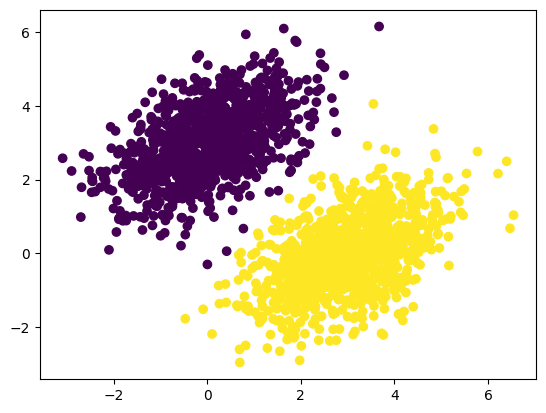

In [40]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

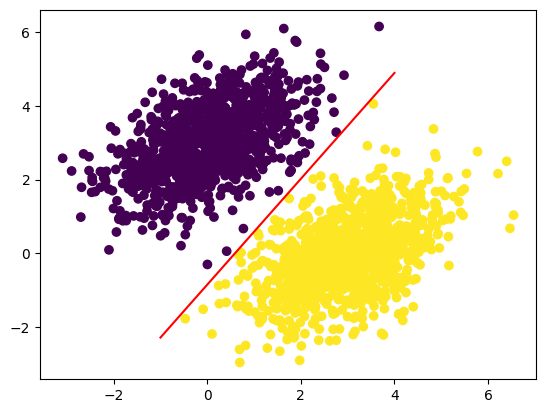

In [41]:
# 모델이 예측한 직선

x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

* 결국 선형 분류기는, 데이터에 있는 두 클래스를 잘 구분하는 직선(또는 초평면)의 파라미터(**W, b**)를 찾는 것

### 3.6 신경망의 구조: Keras API 이해하기

* Keras의 Layer : 가중치와 feed-forward 연산을 캡슐화한 객체

In [42]:
from tensorflow import keras

In [44]:
class SimpleDense(keras.layers.Layer): # 모든 keras 층은 Layer 클래스를 상속
  def __init__(self, units, activation = None):
    super().__init__()
    self.units = units
    self.activation = activation
  def build(self, input_shape):
    input_dim = input_shape[-1]
    # add_weight()는 파라미터를 만들 수 있는 메서드 / 독립적으로 변수를 생성 / 층의 속성 할당
    self.W = self.add_weight(shape = (input_dim, self.units),
                             initializer = 'random_normal')
    self.b = self.add_weight(shape = (self.units, ),
                             initializer = 'zeros')
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + b
    if self.activation is not None: # activation function이 있다면
      y = self.activation(y) # activation function을 통과한 출력
    return y

In [45]:
# SimpleDense 클래스의 인스턴스를 생성하면 텐서를 입력으로 받는 함수로 사용 가능

my_dense = SimpleDense(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape = (2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)
